# feature extraction methods to do 
<ul><li> GLCM  </li>
    <li>GLZM</li>
    <li>GLRM</li>
    <li>wavelet transform with glcm</li>
    <li>lbp   done</li>
    <li>HOG   done</li>
    <li>Hough transform done</li>
    <li style=strong >sift  done </li> 
    <li>surf patented </li>
    <li>wavelet transform done</li>
    <li>BRIEF done</li>
    <li>ORB  done</li>
    <li>harrlick</li>
    <li>gabor filter</li>
    <li>colour histogram</li>
</ul>


In [2]:
import numpy as np 
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pywt
from scipy.stats import skew, kurtosis, entropy
from skimage.feature import local_binary_pattern
from skimage import io, feature
from skimage.feature import graycomatrix, graycoprops
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

to augment only the train data

(1455, 4)

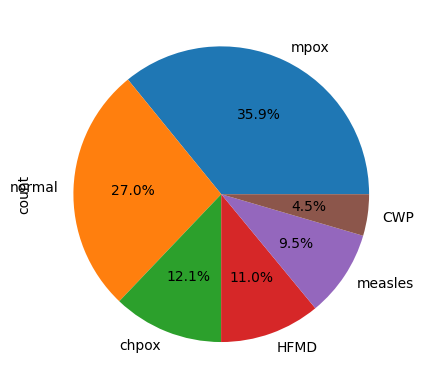

In [64]:
MSDdf=pd.read_csv("/kaggle/input/combined-mpox/MSD_Nsimi.csv")
MSDdf["labels"].value_counts().plot.pie(autopct="%1.1f%%")
MSDdf.shape

In [65]:
MSD, test_df = train_test_split(MSDdf, test_size=0.2, stratify=MSDdf["labels"],random_state=42)

In [66]:
m=pd.concat([MSD, test_df])
# Get the count of paths that appear exactly 2 times
count_exactly_2 = (MSD["paths"].value_counts() == 2).sum()

print(count_exactly_2)


0


In [5]:
test_df.to_csv("test.csv", index=False)


In [6]:
MSD.to_csv("train.csv",index=False)

augmentation

In [7]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=45,
    zoom_range=[0.8, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.1, 2],
    fill_mode='constant',
    rescale=1.0/255.0,
)

cwp

In [8]:
save_dir = "/kaggle/working/augmented_images/CWP"
df_dir="/kaggle/input/combined-mpox/augmented_images/CWP"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "CWP"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(6): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        save_path = os.path.join(save_dir, filename) 
        tf.keras.preprocessing.image.save_img(save_path, batch[0])
        new_row = {'paths': os.path.join(df_dir, filename), 'labels': 'CWP'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")

Augmentation and saving completed.


CHpox

In [9]:
save_dir = "/kaggle/working/augmented_images/CHpox"
df_dir="/kaggle/input/combined-mpox/augmented_images/CHpox"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "chpox"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(5): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        save_path = os.path.join(save_dir, filename) 
        tf.keras.preprocessing.image.save_img(save_path, batch[0])
        new_row = {'paths': os.path.join(df_dir, filename), 'labels': 'chpox'} 
        MSD.loc[len(MSD)] = new_row
print("Augmentation and saving completed.")

Augmentation and saving completed.


measles

In [10]:
save_dir = "/kaggle/working/augmented_images/measles"
df_dir="/kaggle/input/combined-mpox/augmented_images/measles"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "measles"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(5): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        save_path = os.path.join(save_dir, filename) 
        tf.keras.preprocessing.image.save_img(save_path, batch[0])
        new_row = {'paths': os.path.join(df_dir, filename), 'labels': 'measles'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")

Augmentation and saving completed.


HFMD

In [11]:
save_dir = "/kaggle/working/augmented_images/HFMD"
df_dir="/kaggle/input/combined-mpox/augmented_images/HFMD"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "HFMD"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(5): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        save_path = os.path.join(save_dir, filename) 
        tf.keras.preprocessing.image.save_img(save_path, batch[0])
        new_row = {'paths': os.path.join(df_dir, filename), 'labels': 'HFMD'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")

Augmentation and saving completed.


MPox

In [12]:
save_dir = "/kaggle/working/augmented_images/mpox"
df_dir="/kaggle/input/combined-mpox/augmented_images/mpox"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "mpox"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(1): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        save_path = os.path.join(save_dir, filename) 
        tf.keras.preprocessing.image.save_img(save_path, batch[0])
        new_row = {'paths': os.path.join(df_dir, filename), 'labels': 'mpox'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")

Augmentation and saving completed.


In [13]:
save_dir = "/kaggle/working/augmented_images/normal"
df_dir="/kaggle/input/combined-mpox/augmented_images/normal"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "normal"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(1): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        save_path = os.path.join(save_dir, filename) 
        tf.keras.preprocessing.image.save_img(save_path, batch[0])
        new_row = {'paths': os.path.join(df_dir, filename), 'labels': 'normal'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")

Augmentation and saving completed.


<Axes: ylabel='count'>

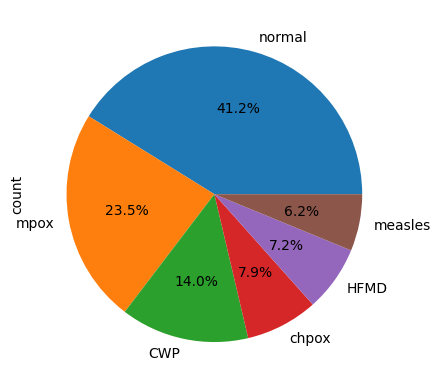

In [16]:
MSD["labels"].value_counts().plot.pie(autopct='%1.1f%%')

In [78]:
MSD.to_csv("augment.csv",index=False)

In [14]:
import shutil

# Path to the working directory
working_dir = '/kaggle/working'

# Path to the output zip file
output_zip = '/kaggle/working/working_folder.zip'

# Create a zip file of the working directory
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', working_dir)


'/kaggle/working/working_folder.zip'

In [ ]:
all_features=pd.DataFrame()

In [3]:
train=pd.read_csv("/kaggle/input/combined-mpox/train_aug.csv")
train["type"]="train"
train=train.drop(columns=["Unnamed: 0"])
train

filename                                              paths  \
0          HFMD_16_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1       chickenpox101.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
2           normal209.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
3        chickenpox66.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
4       HEALTHY_31_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
...                   ...                                                ...   
6976      aug_0_6998.jpeg  /kaggle/input/combined-mpox/augment_folder/nor...   
6977      aug_0_1044.jpeg  /kaggle/input/combined-mpox/augment_folder/nor...   
6978      aug_0_4681.jpeg  /kaggle/input/combined-mpox/augment_folder/nor...   
6979      aug_0_9956.jpeg  /kaggle/input/combined-mpox/augment_folder/nor...   
6980  aug_0_normal146.png  /kaggle/input/combined-mpox/augment_folder/nor...   

      labels source   type  
0       HFMD   MSLD  train  
1      chpox   MSID  train  
2     normal   MSID  train  
3      chpox   MSID  train  
4     normal   MSLD  train  
...      ...    ...    ...  
6976  normal    NaN  train  
6977  normal    NaN  train  
6978  normal    NaN  train  
6979  normal    NaN  train  
6980  normal    NaN  train  

[6981 rows x 5 columns]

In [4]:
test=pd.read_csv("/kaggle/input/combined-mpox/augment_folder/test.csv")
test["type"]="test"
test

filename                                              paths  \
0       CWP_33_04.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1       CWP_37_09.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
2       MSL_17_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
3      HFMD_03_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
4     monkeypox37.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
..                ...                                                ...   
286  chickenpox67.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
287      normal45.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
288     normal287.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
289  chickenpox19.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
290    HFMD_60_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   

      labels source  type  
0        CWP   MSLD  test  
1        CWP   MSLD  test  
2    measles   MSLD  test  
3       HFMD   MSLD  test  
4       mpox   MSID  test  
..       ...    ...   ...  
286    chpox   MSID  test  
287   normal   MSID  test  
288   normal   MSID  test  
289    chpox   MSID  test  
290     HFMD   MSLD  test  

[291 rows x 5 columns]

In [5]:
MSD=pd.concat([train,test])


In [84]:
# Get the count of paths that appear exactly 2 times
count_exactly_2 = (MSD["paths"].value_counts() == 2).sum()

print(count_exactly_2)


0


In [25]:
MSD

filename                                              paths  \
0       HFMD_16_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1    chickenpox101.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
2        normal209.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
3     chickenpox66.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
4    HEALTHY_31_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
..                 ...                                                ...   
286   chickenpox67.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
287       normal45.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
288      normal287.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
289   chickenpox19.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
290     HFMD_60_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   

     labels source   type  
0      HFMD   MSLD  train  
1     chpox   MSID  train  
2    normal   MSID  train  
3     chpox   MSID  train  
4    normal   MSLD  train  
..      ...    ...    ...  
286   chpox   MSID   test  
287  normal   MSID   test  
288  normal   MSID   test  
289   chpox   MSID   test  
290    HFMD   MSLD   test  

[7272 rows x 5 columns]

In [26]:
MSD_pd = pd.get_dummies(MSD, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



filename                                              paths  \
0       HFMD_16_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1    chickenpox101.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
2        normal209.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
3     chickenpox66.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
4    HEALTHY_31_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
..                 ...                                                ...   
286   chickenpox67.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
287       normal45.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
288      normal287.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
289   chickenpox19.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
290     HFMD_60_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   

    source   type  labels_CWP  labels_HFMD  labels_chpox  labels_measles  \
0     MSLD  train           0            1             0               0   
1     MSID  train           0            0             1               0   
2     MSID  train           0            0             0               0   
3     MSID  train           0            0             1               0   
4     MSLD  train           0            0             0               0   
..     ...    ...         ...          ...           ...             ...   
286   MSID   test           0            0             1               0   
287   MSID   test           0            0             0               0   
288   MSID   test           0            0             0               0   
289   MSID   test           0            0             1               0   
290   MSLD   test           0            1             0               0   

     labels_mpox  labels_normal  
0              0              0  
1              0              0  
2              0              1  
3              0              0  
4              0              1  
..           ...            ...  
286            0              0  
287            0              1  
288            0              1  
289            0              0  
290            0              0  

[7272 rows x 10 columns]

In [6]:
x=MSD.groupby("labels").head(3)
x.reset_index(inplace=True)

In [7]:
def process_img1(img):
    img=cv2.imread(img)
    resized=cv2.resize(img,(224,224),interpolation=cv2.INTER_NEAREST)
    image = cv2.normalize(resized, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return image
def process_img(img):
    img=cv2.imread(img)
    resized=cv2.resize(img,(224,224),interpolation=cv2.INTER_NEAREST)
    image = cv2.normalize(resized, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image = clahe.apply(gray_image)
    return image

In [28]:
def apply_wavelet(image, wavelet='haar'):
    coeffs = pywt.dwt2(image, wavelet)
    cA, (cH, cV, cD) = coeffs
    return cA, cH, cV, cD

def compute_glcm(image, distances=[1], angles=[0], levels=256):
    glcm = graycomatrix(image, distances, angles, levels=levels, symmetric=True, normed=True)
    return glcm

def extract_glcm_properties(glcm, properties=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']):
    features = []
    for prop in properties:
        features.append(graycoprops(glcm, prop)[0,0])
    return features
def wave_glcm(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    cA, cH, cV, cD = apply_wavelet(image)
    
    glcm_cA = compute_glcm(cA.astype(np.uint8))
    glcm_cH = compute_glcm(cH.astype(np.uint8))
    glcm_cV = compute_glcm(cV.astype(np.uint8))
    glcm_cD = compute_glcm(cD.astype(np.uint8))
    
    glcm_properties_cA = extract_glcm_properties(glcm_cA)
    glcm_properties_cH = extract_glcm_properties(glcm_cH)
    glcm_properties_cV = extract_glcm_properties(glcm_cV)
    glcm_properties_cD = extract_glcm_properties(glcm_cD)
    feature=[]
    feature.append(glcm_properties_cA)
    feature.append(glcm_properties_cH)
    feature.append(glcm_properties_cV)
    feature.append(glcm_properties_cD)
    return feature


In [29]:
def CalcSIFTFeatures(img, th):
    sift = cv2.xfeatures2d.SIFT_create(th)
    kp, des = sift.detectAndCompute(img, None)
    return des

def CalcORBFeatures(img, th=None):
    orb = cv2.ORB_create()
    kp, des = orb.detectAndCompute(img, None)
    return des

def CalcBRIEFFeatures(img, th=None):
    star = cv2.xfeatures2d.StarDetector_create()
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    kp_star = star.detect(img, None)
    kp, des = brief.compute(img, kp_star)
    return des   

def bag_of_features(features, centres, k = 500):
  vec = np.zeros((1, k))
  for i in range(features.shape[0]):
      feat = features[i]
      diff = np.tile(feat, (k, 1)) - centres
      dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
      idx_dist = dist.argsort()
      idx = idx_dist[0]
      vec[0][idx] += 1
  return vec
def extract_hog_features(images):
    hog_features = []
    for image in images:
        gray1 = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY)
        gray=cv2.resize(gray1,(224,224),interpolation=cv2.INTER_NEAREST)
        
        features, _ = hog(gray, block_norm='L2-Hys', pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return hog_features
def extract_hough_circle_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=15, maxRadius=30)
    
    num_circles = 0
    radii = []
    features=[]
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        num_circles = len(circles)
        for (x, y, r) in circles:
            radii.append(r)
    
    features = [num_circles, np.mean(radii) if radii else 0, np.std(radii) if radii else 0]
    return features

# Function to extract GLCM features
def GLCM(img):
    img_quantized = (img // (256 // 16)).astype('uint8')
    glcm = graycomatrix(img_quantized, distances=[1], angles=[0], levels=16, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')
    energy = graycoprops(glcm, 'energy')
    homogeneity = graycoprops(glcm, 'homogeneity')
    correlation = graycoprops(glcm, 'correlation')
    features = [contrast[0, 0], energy[0, 0], homogeneity[0, 0], correlation[0, 0]]
    return features

# Function to extract wavelet features
def extract_wavelet_features(img, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(img, wavelet, level=level)
    features = []

    for coeff in coeffs:
        if isinstance(coeff, tuple):
            for subband in coeff:
                features.append(np.mean(subband))
                features.append(np.std(subband))
                features.append(np.max(subband))
                features.append(np.min(subband))
                features.append(np.var(subband))
                features.append(skew(subband.flatten()))
                features.append(kurtosis(subband.flatten()))
                features.append(entropy(np.abs(subband).flatten()))
        else:
                features.append(np.mean(coeff))
                features.append(np.std(coeff))
                features.append(np.max(coeff))
                features.append(np.min(coeff))
                features.append(np.var(coeff))
                features.append(skew(coeff.flatten()))
                features.append(kurtosis(coeff.flatten()))
                features.append(entropy(np.abs(coeff).flatten()))

    return np.array(features)

def extract_lbp_features(img, radius=1, n_points=8):
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

In [30]:
def trial( X_train, X_test, y_train, y_test,binary=False):
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    if binary:
        class_name=np.unique(y_train)
        print(class_name)
        class_name_map = {1: "mpox", 0: "others"} 
        class_names = [class_name_map[label] for label in class_name]
    else:
        class_names = np.unique(labels)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
    disp.plot()

## SIFT
it detect corners , rotation invariant and scale invariatnt (unlike harris which is not scale invariant)
finds keypoints and their descriptors

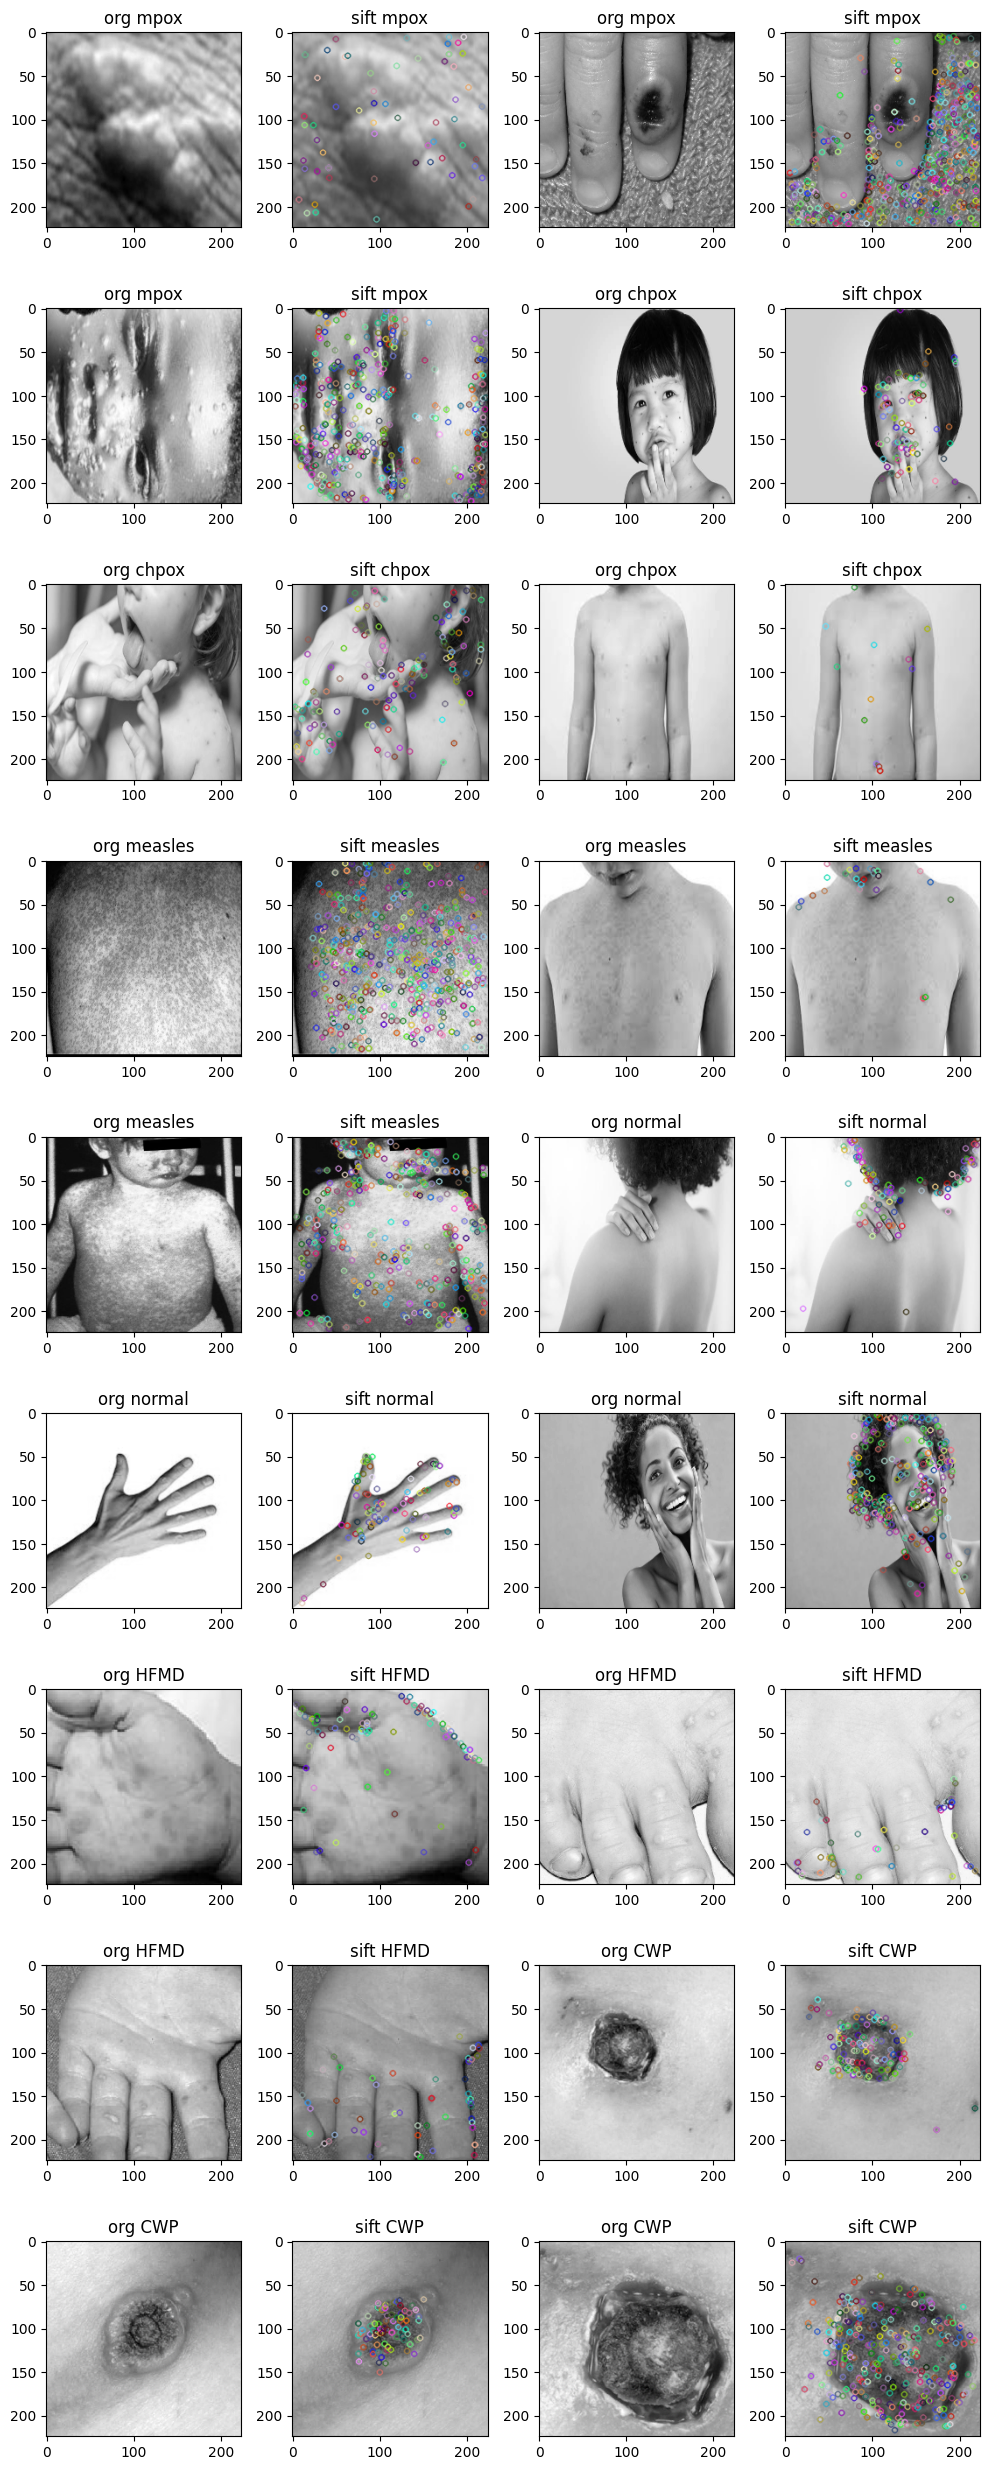

In [46]:
plt.figure(figsize=(10,25))
for i,path in enumerate(x["paths"]):
    name=x["labels"][i]
    img1=process_img(path)
    gray= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY).astype("uint8")
    plt.subplot(9,4,i*2+1)
    plt.imshow(gray,cmap="gray")
    plt.title(f"org {name}")
    sift = cv2.SIFT_create()
    kp = sift.detect(gray,None)
    img2=cv2.drawKeypoints(gray,kp,img1)
    plt.subplot(9,4,i*2+2)
    plt.imshow(img2)
    plt.title(f"sift {name}")
plt.tight_layout()
plt.show()

In [ ]:
image_path = MSD["paths"]
for thresh in range(35,50,2):
  print('\nCalculating for a threshold of {}'.format(thresh))
  features = []
  for file in image_path:
    img =process_img(file)
    img_des = CalcFeatures(img, thresh)
    if img_des is not None:
      features.append(img_des)
  features = np.vstack(features)
  k = 150
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)
  labels = []
  vec = []
  for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img, thresh)
    if img_des is not None:
      img_vec = bag_of_features(img_des, centres, k)
      vec.append(img_vec)
      labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
  vec = np.vstack(vec)
  trial(vec,labels)

In [ ]:
image_path = MSD["paths"]
thresh=41
for k in range(50,200,25):
  print('\nCalculating for a threshold of {}'.format(k))
  features = []
  for file in image_path:
    img =process_img(file)
    img_des = CalcFeatures(img, thresh)
    if img_des is not None:
      features.append(img_des)
  features = np.vstack(features)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)
  labels = []
  vec = []
  for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img, thresh)
    if img_des is not None:
      img_vec = bag_of_features(img_des, centres, k)
      vec.append(img_vec)
      labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
  vec = np.vstack(vec)
  trial(vec,labels)

In [31]:
image_path = MSD["paths"]
thresh=41
k=40
features = []
for file in MSD["paths"]:
    img =process_img(file)
    img_des = CalcSIFTFeatures(img, thresh)
    if img_des is not None:
      features.append(img_des)
features = np.vstack(features)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)
labels = []
vec = []
types=[]
for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcSIFTFeatures(img, thresh)
    if img_des is not None:
      img_vec = bag_of_features(img_des, centres, k)
      vec.append(img_vec)
      labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
      types.append(MSD.loc[MSD['paths'] == file, 'type'].values[0])
    else:
        vec.append([0]*k)
        labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
        types.append(MSD.loc[MSD['paths'] == file, 'type'].values[0])
        
vec = np.vstack(vec)



In [32]:
vec.shape

(7272, 40)

In [33]:
MSD.reset_index(inplace=True)

In [19]:
MSD

filename                                              paths  \
0       HFMD_16_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1    chickenpox101.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
2        normal209.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
3     chickenpox66.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
4    HEALTHY_31_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
..                 ...                                                ...   
286   chickenpox67.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
287       normal45.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
288      normal287.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
289   chickenpox19.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
290     HFMD_60_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   

     labels source   type  
0      HFMD   MSLD  train  
1     chpox   MSID  train  
2    normal   MSID  train  
3     chpox   MSID  train  
4    normal   MSLD  train  
..      ...    ...    ...  
286   chpox   MSID   test  
287  normal   MSID   test  
288  normal   MSID   test  
289   chpox   MSID   test  
290    HFMD   MSLD   test  

[7272 rows x 5 columns]

In [34]:
sift_df=pd.DataFrame(vec,columns=[f"sift{x}"for x in range(k)])
sift_df["paths"]=MSD["paths"]
sift_df["labels"]=MSD["labels"]
sift_df["type"]=MSD["type"]
sift_df

sift0  sift1  sift2  sift3  sift4  sift5  sift6  sift7  sift8  sift9  \
0       0.0    1.0    5.0    2.0    0.0    0.0    0.0    0.0    0.0    5.0   
1       1.0    1.0    1.0    1.0    1.0    1.0    0.0    7.0    0.0    1.0   
2       0.0    1.0    5.0    1.0    0.0    1.0    0.0    2.0    3.0    3.0   
3       0.0    0.0    2.0    0.0    2.0    0.0    3.0    0.0    2.0    0.0   
4       2.0    0.0    3.0    3.0    0.0    0.0    2.0    0.0    2.0    1.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7267    2.0    0.0    1.0    3.0    2.0    0.0    0.0    0.0    0.0    2.0   
7268    1.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0    0.0    2.0   
7269    0.0    0.0    3.0    4.0    1.0    1.0    3.0    0.0    2.0    0.0   
7270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    3.0    0.0    6.0   
7271    0.0    0.0    0.0    0.0    0.0    0.0    0.0   12.0    0.0    8.0   

      ...  sift33  sift34  sift35  sift36  sift37  sift38  sift39  \
0     ...     0.0     2.0     0.0     0.0     0.0     4.0     3.0   
1     ...     0.0     2.0     1.0     0.0     1.0     1.0     0.0   
2     ...     1.0     2.0     1.0     0.0     1.0     3.0     0.0   
3     ...     2.0     2.0     1.0     0.0     2.0     3.0     0.0   
4     ...     2.0     2.0     2.0     0.0     2.0     4.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...   
7267  ...     1.0     2.0     0.0     0.0     1.0     1.0     0.0   
7268  ...     0.0     3.0     0.0     0.0     0.0     5.0     2.0   
7269  ...     4.0     2.0     0.0     0.0     2.0     3.0     1.0   
7270  ...     1.0     0.0     4.0     1.0     0.0     0.0     0.0   
7271  ...     0.0     0.0     4.0     1.0     0.0     0.0     4.0   

                                                  paths  labels   type  
0     /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD  train  
1     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
2     /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal  train  
3     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
4     /kaggle/input/mpox-skin-lesion-dataset-version...  normal  train  
...                                                 ...     ...    ...  
7267  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   test  
7268  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   test  
7269  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   test  
7270  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   test  
7271  /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD   test  

[7272 rows x 43 columns]

In [89]:
sift_df.iloc[:,:40]

sift0  sift1  sift2  sift3  sift4  sift5  sift6  sift7  sift8  sift9  \
0       0.0    1.0    0.0    1.0    5.0    0.0    6.0    6.0    0.0    0.0   
1       0.0    0.0    1.0    1.0    1.0    1.0    1.0    2.0    0.0    0.0   
2       0.0    2.0    0.0    1.0    3.0    1.0    3.0    2.0    1.0    0.0   
3       0.0    0.0    0.0    2.0    2.0    2.0    4.0    0.0    1.0    0.0   
4       0.0    0.0    0.0    2.0    3.0    1.0    4.0    1.0    1.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7267    0.0    0.0    0.0    0.0    1.0    2.0    3.0    0.0    0.0    1.0   
7268    0.0    0.0    0.0    0.0    3.0    1.0    3.0    3.0    2.0    1.0   
7269    2.0    0.0    0.0    3.0    3.0    1.0    3.0    2.0    6.0    1.0   
7270    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
7271   13.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

      ...  sift30  sift31  sift32  sift33  sift34  sift35  sift36  sift37  \
0     ...     3.0     0.0     0.0     5.0     5.0     0.0     0.0     0.0   
1     ...     4.0     0.0     0.0     0.0     1.0     0.0     0.0     8.0   
2     ...     0.0     2.0     3.0     4.0     3.0     0.0     1.0     2.0   
3     ...     2.0     0.0     1.0     0.0     0.0     1.0     0.0     1.0   
4     ...     1.0     0.0     2.0     3.0     2.0     2.0     0.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
7267  ...     5.0     1.0     0.0     1.0     2.0     0.0     0.0     0.0   
7268  ...     1.0     0.0     0.0     1.0     1.0     0.0     1.0     1.0   
7269  ...     2.0     0.0     1.0     2.0     0.0     0.0     1.0     0.0   
7270  ...     0.0     0.0     0.0     0.0     6.0     0.0     0.0     3.0   
7271  ...     0.0     0.0     0.0     0.0     6.0     0.0     0.0    14.0   

      sift38  sift39  
0        0.0     0.0  
1        0.0     0.0  
2        0.0     0.0  
3        1.0     0.0  
4        1.0     0.0  
...      ...     ...  
7267     0.0     0.0  
7268     1.0     0.0  
7269     0.0     0.0  
7270     0.0     0.0  
7271     0.0     0.0  

[7272 rows x 40 columns]

In [94]:
sift_df[sift_df["type"]=="train"]

sift0  sift1  sift2  sift3  sift4  sift5  sift6  sift7  sift8  sift9  \
0       0.0    1.0    0.0    1.0    5.0    0.0    6.0    6.0    0.0    0.0   
1       0.0    0.0    1.0    1.0    1.0    1.0    1.0    2.0    0.0    0.0   
2       0.0    2.0    0.0    1.0    3.0    1.0    3.0    2.0    1.0    0.0   
3       0.0    0.0    0.0    2.0    2.0    2.0    4.0    0.0    1.0    0.0   
4       0.0    0.0    0.0    2.0    3.0    1.0    4.0    1.0    1.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6976    0.0    2.0    1.0    0.0    2.0    2.0    1.0    1.0    1.0    1.0   
6977    1.0    2.0    0.0    0.0    2.0    1.0    1.0    0.0    1.0    1.0   
6978    4.0    2.0    1.0    0.0    0.0    0.0    2.0    1.0    1.0    0.0   
6979    1.0    1.0    0.0    2.0    1.0    2.0    3.0    3.0    0.0    0.0   
6980    6.0    2.0    0.0    1.0    3.0    1.0    1.0    1.0    0.0    0.0   

      ...  sift33  sift34  sift35  sift36  sift37  sift38  sift39  \
0     ...     5.0     5.0     0.0     0.0     0.0     0.0     0.0   
1     ...     0.0     1.0     0.0     0.0     8.0     0.0     0.0   
2     ...     4.0     3.0     0.0     1.0     2.0     0.0     0.0   
3     ...     0.0     0.0     1.0     0.0     1.0     1.0     0.0   
4     ...     3.0     2.0     2.0     0.0     0.0     1.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...   
6976  ...     0.0     0.0     0.0     3.0     2.0     0.0     0.0   
6977  ...     0.0     1.0     0.0     2.0     1.0     1.0     1.0   
6978  ...     0.0     7.0     1.0     0.0     2.0     0.0     0.0   
6979  ...     1.0     1.0     0.0     1.0     1.0     0.0     0.0   
6980  ...     2.0     6.0     0.0     0.0     0.0     0.0     0.0   

                                                  paths  labels   type  
0     /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD  train  
1     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
2     /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal  train  
3     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
4     /kaggle/input/mpox-skin-lesion-dataset-version...  normal  train  
...                                                 ...     ...    ...  
6976  /kaggle/input/combined-mpox/augment_folder/nor...  normal  train  
6977  /kaggle/input/combined-mpox/augment_folder/nor...  normal  train  
6978  /kaggle/input/combined-mpox/augment_folder/nor...  normal  train  
6979  /kaggle/input/combined-mpox/augment_folder/nor...  normal  train  
6980  /kaggle/input/combined-mpox/augment_folder/nor...  normal  train  

[6981 rows x 43 columns]

Accuracy: 0.44673539518900346


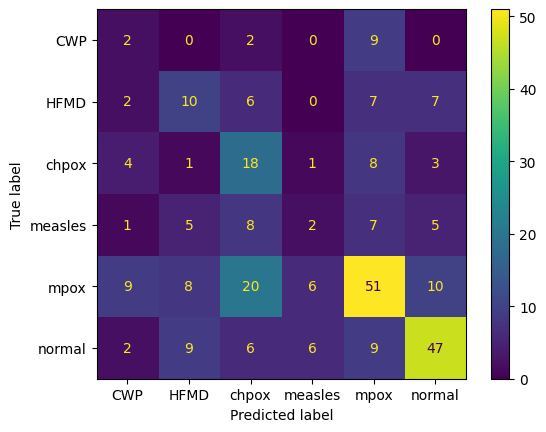

In [99]:
trial(sift_df[sift_df["type"]=="train"].iloc[:,:40],
      sift_df[sift_df["type"]=="test"].iloc[:,:40],
      sift_df[sift_df["type"]=="train"]["labels"],
      sift_df[sift_df["type"]=="test"]["labels"])

In [35]:
csv_file_path = 'siftENCH.csv' 
sift_df.to_csv(csv_file_path, index=False)
sift_df

sift0  sift1  sift2  sift3  sift4  sift5  sift6  sift7  sift8  sift9  \
0       0.0    1.0    5.0    2.0    0.0    0.0    0.0    0.0    0.0    5.0   
1       1.0    1.0    1.0    1.0    1.0    1.0    0.0    7.0    0.0    1.0   
2       0.0    1.0    5.0    1.0    0.0    1.0    0.0    2.0    3.0    3.0   
3       0.0    0.0    2.0    0.0    2.0    0.0    3.0    0.0    2.0    0.0   
4       2.0    0.0    3.0    3.0    0.0    0.0    2.0    0.0    2.0    1.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7267    2.0    0.0    1.0    3.0    2.0    0.0    0.0    0.0    0.0    2.0   
7268    1.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0    0.0    2.0   
7269    0.0    0.0    3.0    4.0    1.0    1.0    3.0    0.0    2.0    0.0   
7270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    3.0    0.0    6.0   
7271    0.0    0.0    0.0    0.0    0.0    0.0    0.0   12.0    0.0    8.0   

      ...  sift33  sift34  sift35  sift36  sift37  sift38  sift39  \
0     ...     0.0     2.0     0.0     0.0     0.0     4.0     3.0   
1     ...     0.0     2.0     1.0     0.0     1.0     1.0     0.0   
2     ...     1.0     2.0     1.0     0.0     1.0     3.0     0.0   
3     ...     2.0     2.0     1.0     0.0     2.0     3.0     0.0   
4     ...     2.0     2.0     2.0     0.0     2.0     4.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...   
7267  ...     1.0     2.0     0.0     0.0     1.0     1.0     0.0   
7268  ...     0.0     3.0     0.0     0.0     0.0     5.0     2.0   
7269  ...     4.0     2.0     0.0     0.0     2.0     3.0     1.0   
7270  ...     1.0     0.0     4.0     1.0     0.0     0.0     0.0   
7271  ...     0.0     0.0     4.0     1.0     0.0     0.0     4.0   

                                                  paths  labels   type  
0     /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD  train  
1     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
2     /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal  train  
3     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
4     /kaggle/input/mpox-skin-lesion-dataset-version...  normal  train  
...                                                 ...     ...    ...  
7267  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   test  
7268  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   test  
7269  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   test  
7270  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   test  
7271  /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD   test  

[7272 rows x 43 columns]

In [101]:
MSD_pd = pd.get_dummies(sift_df, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



sift0  sift1  sift2  sift3  sift4  sift5  sift6  sift7  sift8  sift9  \
0       0.0    1.0    0.0    1.0    5.0    0.0    6.0    6.0    0.0    0.0   
1       0.0    0.0    1.0    1.0    1.0    1.0    1.0    2.0    0.0    0.0   
2       0.0    2.0    0.0    1.0    3.0    1.0    3.0    2.0    1.0    0.0   
3       0.0    0.0    0.0    2.0    2.0    2.0    4.0    0.0    1.0    0.0   
4       0.0    0.0    0.0    2.0    3.0    1.0    4.0    1.0    1.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7267    0.0    0.0    0.0    0.0    1.0    2.0    3.0    0.0    0.0    1.0   
7268    0.0    0.0    0.0    0.0    3.0    1.0    3.0    3.0    2.0    1.0   
7269    2.0    0.0    0.0    3.0    3.0    1.0    3.0    2.0    6.0    1.0   
7270    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
7271   13.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

      ...  sift38  sift39                                              paths  \
0     ...     0.0     0.0  /kaggle/input/mpox-skin-lesion-dataset-version...   
1     ...     0.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
2     ...     0.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
3     ...     1.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
4     ...     1.0     0.0  /kaggle/input/mpox-skin-lesion-dataset-version...   
...   ...     ...     ...                                                ...   
7267  ...     0.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
7268  ...     1.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
7269  ...     0.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
7270  ...     0.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
7271  ...     0.0     0.0  /kaggle/input/mpox-skin-lesion-dataset-version...   

       type  labels_CWP  labels_HFMD  labels_chpox  labels_measles  \
0     train           0            1             0               0   
1     train           0            0             1               0   
2     train           0            0             0               0   
3     train           0            0             1               0   
4     train           0            0             0               0   
...     ...         ...          ...           ...             ...   
7267   test           0            0             1               0   
7268   test           0            0             0               0   
7269   test           0            0             0               0   
7270   test           0            0             1               0   
7271   test           0            1             0               0   

      labels_mpox  labels_normal  
0               0              0  
1               0              0  
2               0              1  
3               0              0  
4               0              1  
...           ...            ...  
7267            0              0  
7268            0              1  
7269            0              1  
7270            0              0  
7271            0              0  

[7272 rows x 48 columns]

Accuracy: 0.6597938144329897
[0 1]


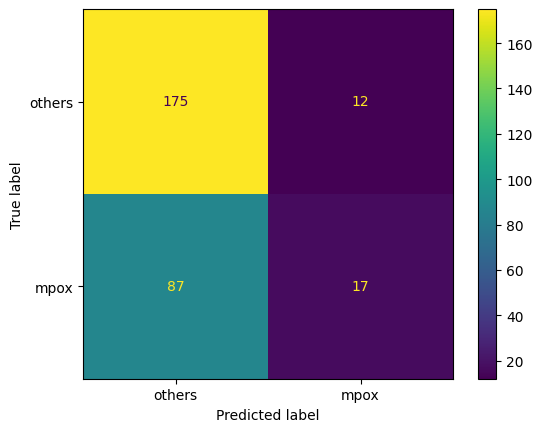

In [108]:
trial(MSD_pd[MSD_pd["type"]=="train"].iloc[:,:40],
      MSD_pd[MSD_pd["type"]=="test"].iloc[:,:40],
      MSD_pd[MSD_pd["type"]=="train"]["labels_mpox"],
      MSD_pd[MSD_pd["type"]=="test"]["labels_mpox"],
      binary=True)

In [117]:
MSD_pd[MSD_pd["type"]=="train"]

sift0  sift1  sift2  sift3  sift4  sift5  sift6  sift7  sift8  sift9  \
0       0.0    1.0    0.0    1.0    5.0    0.0    6.0    6.0    0.0    0.0   
1       0.0    0.0    1.0    1.0    1.0    1.0    1.0    2.0    0.0    0.0   
2       0.0    2.0    0.0    1.0    3.0    1.0    3.0    2.0    1.0    0.0   
3       0.0    0.0    0.0    2.0    2.0    2.0    4.0    0.0    1.0    0.0   
4       0.0    0.0    0.0    2.0    3.0    1.0    4.0    1.0    1.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6976    0.0    2.0    1.0    0.0    2.0    2.0    1.0    1.0    1.0    1.0   
6977    1.0    2.0    0.0    0.0    2.0    1.0    1.0    0.0    1.0    1.0   
6978    4.0    2.0    1.0    0.0    0.0    0.0    2.0    1.0    1.0    0.0   
6979    1.0    1.0    0.0    2.0    1.0    2.0    3.0    3.0    0.0    0.0   
6980    6.0    2.0    0.0    1.0    3.0    1.0    1.0    1.0    0.0    0.0   

      ...  sift38  sift39                                              paths  \
0     ...     0.0     0.0  /kaggle/input/mpox-skin-lesion-dataset-version...   
1     ...     0.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
2     ...     0.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
3     ...     1.0     0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
4     ...     1.0     0.0  /kaggle/input/mpox-skin-lesion-dataset-version...   
...   ...     ...     ...                                                ...   
6976  ...     0.0     0.0  /kaggle/input/combined-mpox/augment_folder/nor...   
6977  ...     1.0     1.0  /kaggle/input/combined-mpox/augment_folder/nor...   
6978  ...     0.0     0.0  /kaggle/input/combined-mpox/augment_folder/nor...   
6979  ...     0.0     0.0  /kaggle/input/combined-mpox/augment_folder/nor...   
6980  ...     0.0     0.0  /kaggle/input/combined-mpox/augment_folder/nor...   

       type  labels_CWP  labels_HFMD  labels_chpox  labels_measles  \
0     train           0            1             0               0   
1     train           0            0             1               0   
2     train           0            0             0               0   
3     train           0            0             1               0   
4     train           0            0             0               0   
...     ...         ...          ...           ...             ...   
6976  train           0            0             0               0   
6977  train           0            0             0               0   
6978  train           0            0             0               0   
6979  train           0            0             0               0   
6980  train           0            0             0               0   

      labels_mpox  labels_normal  
0               0              0  
1               0              0  
2               0              1  
3               0              0  
4               0              1  
...           ...            ...  
6976            0              1  
6977            0              1  
6978            0              1  
6979            0              1  
6980            0              1  

[6981 rows x 48 columns]

In [115]:
MSD_pd[MSD_pd["type"]=="train"]["labels_mpox"].value_counts()

labels_mpox
0    5740
1    1241
Name: count, dtype: int64

In [125]:
MSDx=MSD_pd[MSD_pd["type"]=="train"].groupby("labels_mpox").head(1241)
MSDx.reset_index(inplace=True)
MSDx=MSDx.drop(columns=["index"])

In [121]:
MSDx["labels_mpox"].value_counts()


labels_mpox
0    1241
1    1241
Name: count, dtype: int64

Accuracy: 0.6426116838487973
[0 1]


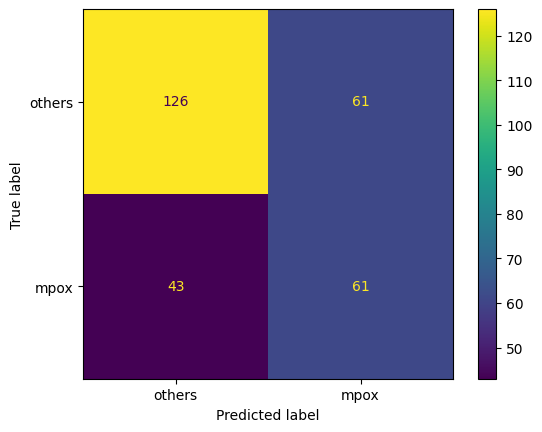

In [126]:
trial(MSDx.iloc[:,:40],
      MSD_pd[MSD_pd["type"]=="test"].iloc[:,:40],
      MSDx[MSDx["type"]=="train"]["labels_mpox"],
      MSD_pd[MSD_pd["type"]=="test"]["labels_mpox"],
      binary=True)

## ORB

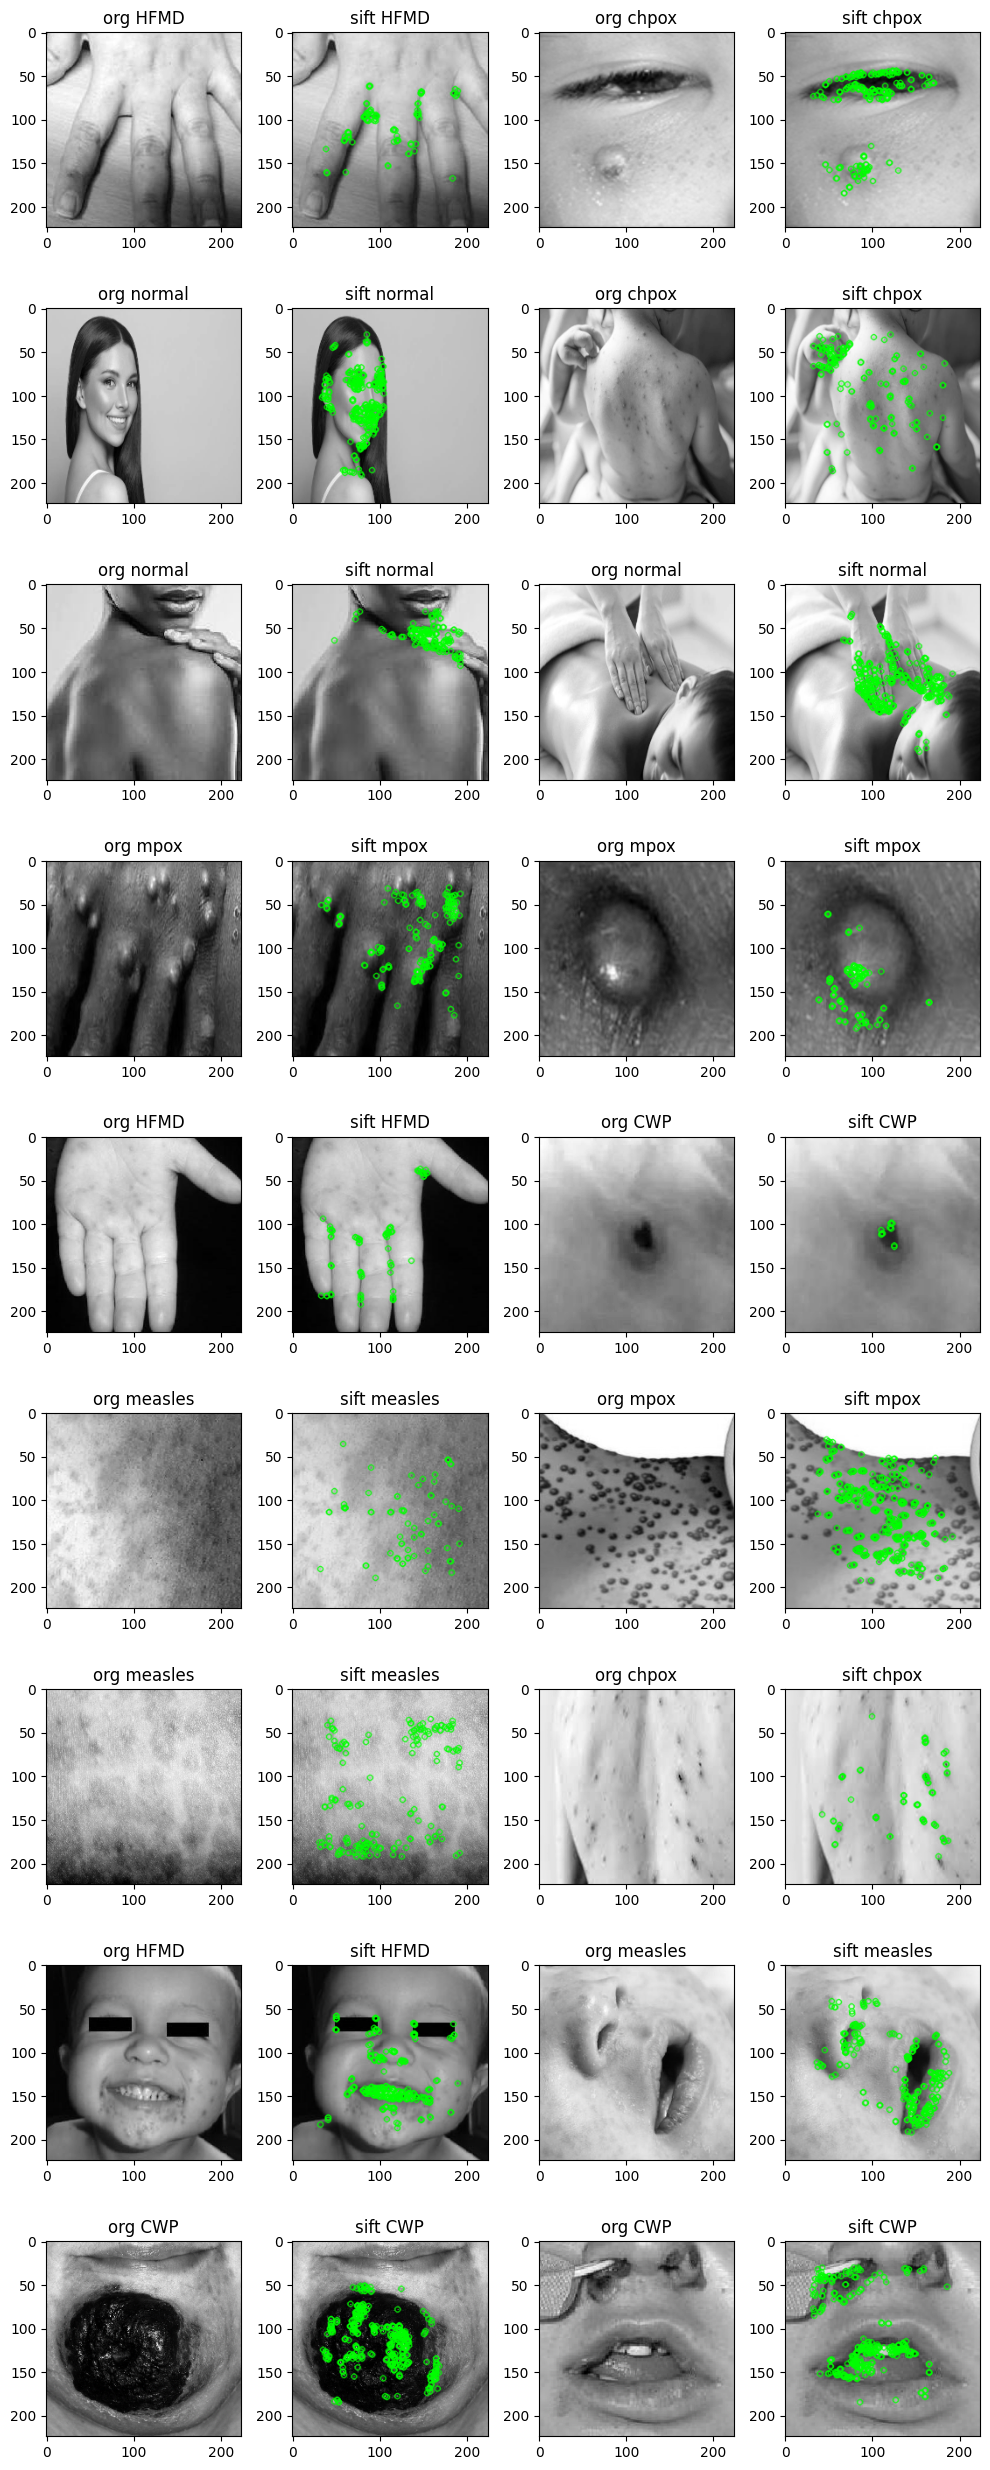

In [8]:
plt.figure(figsize=(10,25))
for i,path in enumerate(x["paths"]):
    name=x["labels"][i]
    img1=process_img1(path)
    gray= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY).astype("uint8")
    plt.subplot(9,4,i*2+1)
    plt.imshow(gray,cmap="gray")
    plt.title(f"org {name}")
    orb = cv2.ORB_create()
    kp = orb.detect(gray,None)
    kp, des = orb.compute(gray, kp)
    img2 = cv2.drawKeypoints(gray, kp, None, color=(0,255,0), flags=0)
    plt.subplot(9,4,i*2+2)
    plt.imshow(img2)
    plt.title(f"sift {name}")
plt.tight_layout()
plt.show()

In [ ]:
image_path = MSD["paths"]

for k in range(10,60,5):
    features = []
    for file in image_path:
        img = cv2.imread(file, 0)
        img_des = CalcORBFeatures(img, thresh)
        if img_des is not None:
            features.append(img_des)
    features = np.vstack(features)
    k = 150
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    features = np.vstack(features).astype(np.float32)
    compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)
    labels = []
    vec = []
    for file in image_path:
        img = cv2.imread(file, 0)
        img_des = CalcORBFeatures(img, thresh)
        if img_des is not None:
            img_vec = bag_of_features(img_des, centres, k)
            vec.append(img_vec)
            labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
        else:
            vec.append([0]*k)
            labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
    vec = np.vstack(vec)
    trial(vec,labels)

In [39]:
image_path = MSD["paths"]

k=85
features = []
for file in image_path:
    img = process_img(file)
    img_des = CalcORBFeatures(img, thresh)
    if img_des is not None:
        features.append(img_des)
features = np.vstack(features)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
features = np.vstack(features).astype(np.float32)
compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)
labels = []
vec = []
for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcORBFeatures(img, thresh)
    if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
    else:
        vec.append([0]*k)
        labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
vec = np.vstack(vec)


In [37]:
vec.shape

(7272, 85)

In [40]:
orb_df=pd.DataFrame(vec,columns=[f"orb{x}"for x in range(k)])
orb_df["paths"]=MSD["paths"]
orb_df["labels"]=MSD["labels"]
orb_df["type"]=MSD["type"]
csv_file_path = 'orbENCH.csv' 
orb_df.to_csv(csv_file_path, index=False)

Accuracy: 0.4879725085910653


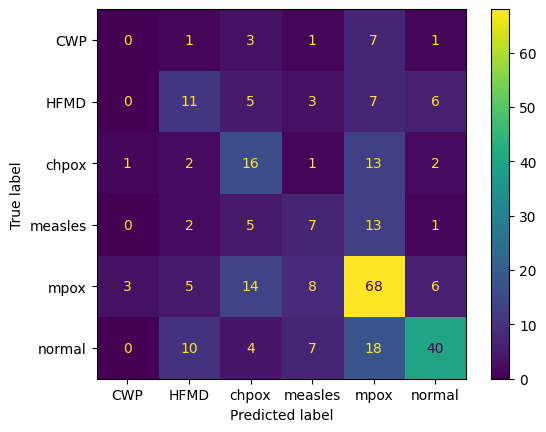

In [138]:
trial(orb_df[orb_df["type"]=="train"].iloc[:,:85],
      orb_df[orb_df["type"]=="test"].iloc[:,:85],
      orb_df[orb_df["type"]=="train"]["labels"],
      orb_df[orb_df["type"]=="test"]["labels"])

In [141]:
MSD[MSD["type"]=="train"]["labels"].value_counts()

labels
chpox      1526
HFMD       1396
mpox       1241
measles    1198
normal      936
CWP         684
Name: count, dtype: int64

In [145]:
MSDz=orb_df[orb_df["type"]=="train"].groupby("labels").head(684)
MSDz.reset_index(inplace=True)
MSDz=MSDz.drop(columns=["index"])

In [147]:
MSDz["labels"].value_counts()

labels
HFMD       684
chpox      684
normal     684
mpox       684
CWP        684
measles    684
Name: count, dtype: int64

Accuracy: 0.4948453608247423


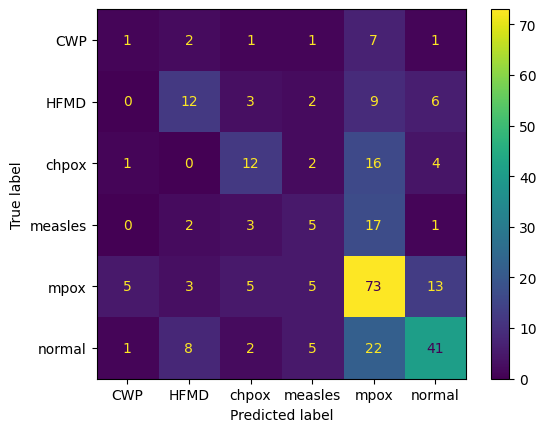

In [146]:
trial(MSDz.iloc[:,:85],
      orb_df[orb_df["type"]=="test"].iloc[:,:85],
      MSDz[MSDz["type"]=="train"]["labels"],
      orb_df[orb_df["type"]=="test"]["labels"])

In [148]:
MSD_pd = pd.get_dummies(orb_df, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



orb0  orb1  orb2  orb3  orb4  orb5  orb6  orb7  orb8  orb9  ...  orb83  \
0      0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  ...    2.0   
1      3.0   1.0   1.0   3.0   0.0   0.0   0.0   7.0   0.0   0.0  ...    0.0   
2      1.0   2.0   5.0   1.0   6.0   0.0   0.0   1.0   3.0   2.0  ...    6.0   
3      6.0   1.0   3.0   7.0   1.0   0.0   1.0   3.0   3.0   0.0  ...    0.0   
4      0.0   5.0   1.0   1.0   0.0   0.0   2.0   0.0   1.0   1.0  ...    0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
7267   0.0   3.0   4.0   1.0   0.0   0.0   0.0   2.0   4.0   0.0  ...    0.0   
7268   4.0   3.0  15.0   3.0   1.0   0.0   2.0   5.0   1.0   0.0  ...    1.0   
7269   1.0   8.0   0.0   0.0   5.0   1.0   6.0   0.0   2.0   2.0  ...    1.0   
7270   0.0   0.0   2.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...    0.0   
7271   5.0   4.0   1.0   4.0   3.0   3.0   5.0   2.0   1.0   1.0  ...    2.0   

      orb84                                              paths   type  \
0       0.0  /kaggle/input/mpox-skin-lesion-dataset-version...  train   
1      10.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...  train   
2       0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...  train   
3       3.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...  train   
4       0.0  /kaggle/input/mpox-skin-lesion-dataset-version...  train   
...     ...                                                ...    ...   
7267    0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7268    5.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7269    0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7270    0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7271    0.0  /kaggle/input/mpox-skin-lesion-dataset-version...   test   

      labels_CWP  labels_HFMD  labels_chpox  labels_measles  labels_mpox  \
0              0            1             0               0            0   
1              0            0             1               0            0   
2              0            0             0               0            0   
3              0            0             1               0            0   
4              0            0             0               0            0   
...          ...          ...           ...             ...          ...   
7267           0            0             1               0            0   
7268           0            0             0               0            0   
7269           0            0             0               0            0   
7270           0            0             1               0            0   
7271           0            1             0               0            0   

      labels_normal  
0                 0  
1                 0  
2                 1  
3                 0  
4                 1  
...             ...  
7267              0  
7268              1  
7269              1  
7270              0  
7271              0  

[7272 rows x 93 columns]

In [149]:
MSDx=MSD_pd[MSD_pd["type"]=="train"].groupby("labels_mpox").head(1241)
MSDx.reset_index(inplace=True)
MSDx=MSDx.drop(columns=["index"])

Accuracy: 0.6804123711340206
[0 1]


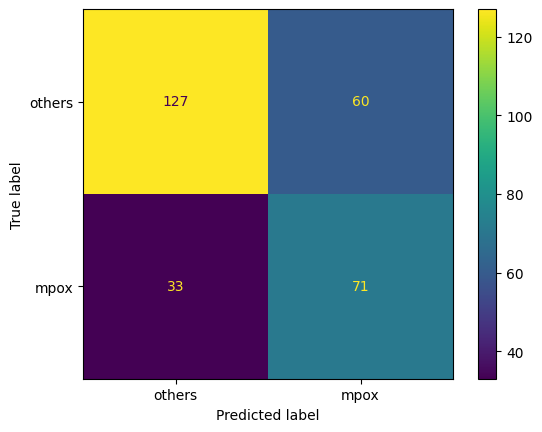

In [150]:
trial(MSDx.iloc[:,:85],
      MSD_pd[MSD_pd["type"]=="test"].iloc[:,:85],
      MSDx[MSDx["type"]=="train"]["labels_mpox"],
      MSD_pd[MSD_pd["type"]=="test"]["labels_mpox"],
      binary=True)

## BRIEF

In [44]:
image_path = MSD["paths"]
k=30
features = []

for file in image_path:
    img = process_img(file)
    img_des = CalcBRIEFFeatures(img, thresh)
    if img_des is not None:
        features.append(img_des)
features = np.vstack(features)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
features = np.vstack(features).astype(np.float32)
compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)
labels = []
vec = []
for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcBRIEFFeatures(img, thresh)
    if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
    else:
        vec.append([0]*k)
        labels.append(MSD.loc[MSD['paths'] == file, 'labels'].values[0])
vec = np.vstack(vec)


In [152]:
vec.shape

(7272, 30)

In [45]:
brief_df=pd.DataFrame(vec,columns=[f"brief{x}"for x in range(k)])
brief_df["paths"]=MSD["paths"]
brief_df["labels"]=MSD["labels"]
brief_df["type"]=MSD["type"]
brief_df

brief0  brief1  brief2  brief3  brief4  brief5  brief6  brief7  brief8  \
0        0.0     0.0     0.0     2.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        1.0     2.0     1.0     0.0     0.0     1.0     0.0     1.0     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7267     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7268     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   
7269     0.0     1.0     2.0     0.0     0.0     2.0     0.0     1.0     0.0   
7270     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7271     0.0     3.0     0.0     0.0     0.0     1.0     1.0     0.0     0.0   

      brief9  ...  brief23  brief24  brief25  brief26  brief27  brief28  \
0        0.0  ...      0.0      0.0      0.0      0.0      1.0      0.0   
1        1.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
2        1.0  ...      3.0      0.0      0.0      1.0      3.0      0.0   
3        0.0  ...      0.0      0.0      0.0      0.0      1.0      0.0   
4        0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
...      ...  ...      ...      ...      ...      ...      ...      ...   
7267     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
7268     0.0  ...      0.0      1.0      1.0      0.0      1.0      0.0   
7269     2.0  ...      1.0      1.0      0.0      1.0      0.0      0.0   
7270     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
7271     1.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   

      brief29                                              paths  labels  \
0         0.0  /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD   
1         0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   
2         4.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   
3         0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   
4         0.0  /kaggle/input/mpox-skin-lesion-dataset-version...  normal   
...       ...                                                ...     ...   
7267      0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   
7268      0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   
7269      0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   
7270      0.0  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   
7271      0.0  /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD   

       type  
0     train  
1     train  
2     train  
3     train  
4     train  
...     ...  
7267   test  
7268   test  
7269   test  
7270   test  
7271   test  

[7272 rows x 33 columns]

In [46]:
csv_file_path = 'briefENCH.csv' 
brief_df.to_csv(csv_file_path, index=False)

Accuracy: 0.281786941580756


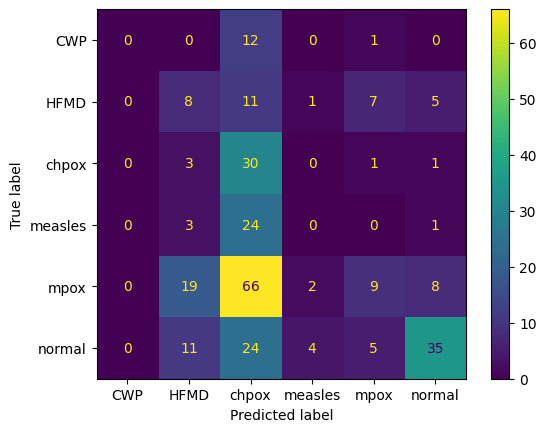

In [155]:
trial(brief_df[brief_df["type"]=="train"].iloc[:,:30],
      brief_df[brief_df["type"]=="test"].iloc[:,:30],
      brief_df[brief_df["type"]=="train"]["labels"],
      brief_df[brief_df["type"]=="test"]["labels"])

In [158]:
MSDz=brief_df[brief_df["type"]=="train"].groupby("labels").head(684)
MSDz.reset_index(inplace=True)
MSDz=MSDz.drop(columns=["index"])

Accuracy: 0.3127147766323024


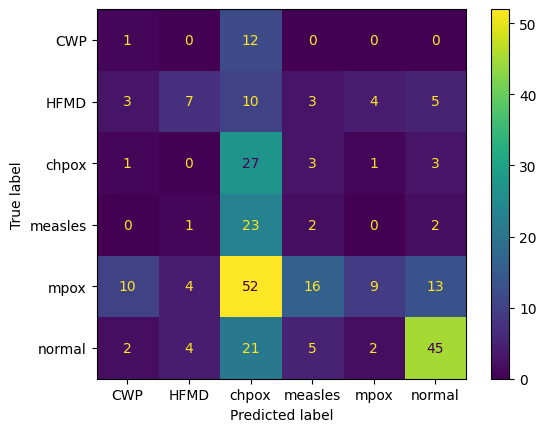

In [160]:
trial(MSDz.iloc[:,:30],
      brief_df[brief_df["type"]=="test"].iloc[:,:30],
      MSDz[MSDz["type"]=="train"]["labels"],
      brief_df[brief_df["type"]=="test"]["labels"])

In [163]:
MSD_pd = pd.get_dummies(brief_df, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



brief0  brief1  brief2  brief3  brief4  brief5  brief6  brief7  brief8  \
0        0.0     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     2.0     0.0     0.0     2.0     1.0     0.0     3.0     0.0   
3        0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7267     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7268     1.0     1.0     2.0     0.0     0.0     0.0     1.0     1.0     0.0   
7269     0.0     0.0     0.0     0.0     0.0     1.0     3.0     0.0     0.0   
7270     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7271     0.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0     0.0   

      brief9  ...  brief28  brief29  \
0        0.0  ...      0.0      0.0   
1        1.0  ...      0.0      0.0   
2        2.0  ...      0.0      1.0   
3        0.0  ...      0.0      0.0   
4        0.0  ...      0.0      0.0   
...      ...  ...      ...      ...   
7267     0.0  ...      0.0      0.0   
7268     0.0  ...      0.0      0.0   
7269     0.0  ...      1.0      0.0   
7270     0.0  ...      0.0      0.0   
7271     0.0  ...      1.0      0.0   

                                                  paths   type  labels_CWP  \
0     /kaggle/input/mpox-skin-lesion-dataset-version...  train           0   
1     /kaggle/input/monkeypoxskinimagedataset/Monkey...  train           0   
2     /kaggle/input/monkeypoxskinimagedataset/Monkey...  train           0   
3     /kaggle/input/monkeypoxskinimagedataset/Monkey...  train           0   
4     /kaggle/input/mpox-skin-lesion-dataset-version...  train           0   
...                                                 ...    ...         ...   
7267  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7268  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7269  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7270  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7271  /kaggle/input/mpox-skin-lesion-dataset-version...   test           0   

      labels_HFMD  labels_chpox  labels_measles  labels_mpox  labels_normal  
0               1             0               0            0              0  
1               0             1               0            0              0  
2               0             0               0            0              1  
3               0             1               0            0              0  
4               0             0               0            0              1  
...           ...           ...             ...          ...            ...  
7267            0             1               0            0              0  
7268            0             0               0            0              1  
7269            0             0               0            0              1  
7270            0             1               0            0              0  
7271            1             0               0            0              0  

[7272 rows x 38 columns]

In [164]:
MSDx=MSD_pd[MSD_pd["type"]=="train"].groupby("labels_mpox").head(1241)
MSDx.reset_index(inplace=True)
MSDx=MSDx.drop(columns=["index"])

Accuracy: 0.5051546391752577
[0 1]


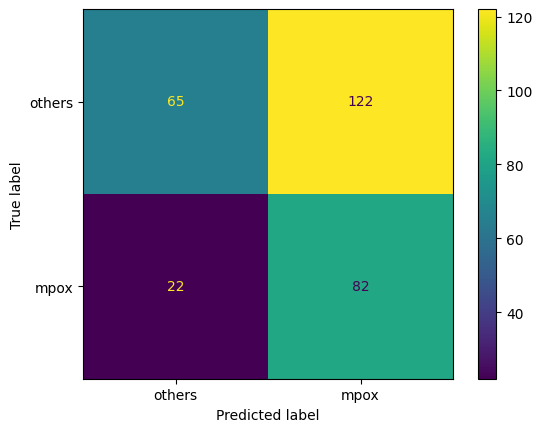

In [165]:
trial(MSDx.iloc[:,:30],
      MSD_pd[MSD_pd["type"]=="test"].iloc[:,:30],
      MSDx[MSDx["type"]=="train"]["labels_mpox"],
      MSD_pd[MSD_pd["type"]=="test"]["labels_mpox"],
      binary=True)

## wavelet features

In [47]:
wavelet_df=pd.DataFrame(columns = [ 'Mean_cA', 'Std_cA', 'Max_cA', 'Min_cA', 'Var_cA', 'Skew_cA', 'Kurtosis_cA', 'Entropy_cA', 'Mean_cH', 'Std_cH', 'Max_cH', 'Min_cH', 'Var_cH', 'Skew_cH', 'Kurtosis_cH', 'Entropy_cH', 'Mean_cV', 'Std_cV', 'Max_cV', 'Min_cV', 'Var_cV', 'Skew_cV', 'Kurtosis_cV', 'Entropy_cV', 'Mean_cD', 'Std_cD', 'Max_cD', 'Min_cD', 'Var_cD', 'Skew_cD', 'Kurtosis_cD', 'Entropy_cD'])
wavelet_df

Empty DataFrame
Columns: [Mean_cA, Std_cA, Max_cA, Min_cA, Var_cA, Skew_cA, Kurtosis_cA, Entropy_cA, Mean_cH, Std_cH, Max_cH, Min_cH, Var_cH, Skew_cH, Kurtosis_cH, Entropy_cH, Mean_cV, Std_cV, Max_cV, Min_cV, Var_cV, Skew_cV, Kurtosis_cV, Entropy_cV, Mean_cD, Std_cD, Max_cD, Min_cD, Var_cD, Skew_cD, Kurtosis_cD, Entropy_cD]
Index: []

[0 rows x 32 columns]

In [48]:
for i in MSD["paths"]:
    img=process_img(i)
    features = extract_wavelet_features(img)
    # print(len(features))
    wavelet_df.loc[len(wavelet_df)]=features

In [49]:
wavelet_df["paths"]=MSD["paths"]
wavelet_df["labels"]=MSD["labels"]
wavelet_df["type"]=MSD["type"]
wavelet_df=wavelet_df.fillna(0)

In [51]:
csv_file_path = 'waveletENCH.csv' 
wavelet_df.to_csv(csv_file_path, index=False)
wavelet_df

Mean_cA      Std_cA  Max_cA  Min_cA        Var_cA   Skew_cA  \
0     317.194157  101.663555   493.0    20.0  10335.478466 -0.698848   
1     343.965202   79.416864   486.0     3.0   6307.038310 -1.672050   
2     339.814094  104.440237   504.5     5.5  10907.763071 -1.616158   
3     279.793288  106.421882   509.0    19.5  11325.617028  0.203153   
4     271.793009  112.931518   506.5     9.0  12753.527766  0.144442   
...          ...         ...     ...     ...           ...       ...   
7267  352.870297   85.281162   504.0    11.5   7272.876512 -1.209393   
7268  385.975805  140.727964   510.0    10.0  19804.359926 -0.876983   
7269  294.512516  108.148020   508.0    22.0  11695.994303 -0.028942   
7270  349.583466   68.930010   482.5    18.0   4751.346310 -2.565510   
7271  279.829440   97.518261   498.5    17.5   9509.811212 -0.209684   

      Kurtosis_cA  Entropy_cA   Mean_cH     Std_cH  ...    Std_cD  Max_cD  \
0       -0.236995    9.377570  0.398398   8.194711  ...  2.749221    23.5   
1        3.343155    9.403732 -0.060945   8.328985  ...  2.187049    16.0   
2        1.456951    9.374875  0.188217   8.285561  ...  4.400368    80.0   
3       -0.669923    9.361791 -0.199458   8.043533  ...  3.430149    34.5   
4       -0.910184    9.345813  0.177495  10.092199  ...  2.723405    74.5   
...           ...         ...       ...        ...  ...       ...     ...   
7267     1.067632    9.402883  0.069515   5.442156  ...  3.823395    50.5   
7268    -0.495171    9.356362 -0.171755  10.027693  ...  3.651330    42.0   
7269    -0.839191    9.364955 -0.077806   7.906398  ...  4.667742    74.5   
7270     7.270816    9.411491  0.213329   5.135416  ...  2.479759    29.5   
7271    -0.712502    9.370843 -0.327049  16.304180  ...  7.576243   106.5   

      Min_cD     Var_cD   Skew_cD  Kurtosis_cD  Entropy_cD  \
0      -26.5   7.558216 -0.073597     9.897308    8.886063   
1      -21.0   4.783182  0.075012     4.303793    8.990449   
2      -56.5  19.363236  0.473746    44.012939    7.927117   
3      -44.5  11.765921 -0.212205    17.850054    8.752968   
4      -61.5   7.416937 -0.721914   184.232234    7.526300   
...      ...        ...       ...          ...         ...   
7267   -56.0  14.618349 -0.027284    16.817430    8.904848   
7268   -63.0  13.332210 -0.358425    26.331012    8.207916   
7269   -59.0  21.787812  0.133251    37.629363    8.412949   
7270   -70.5   6.149204 -2.473087    78.631310    8.530529   
7271  -118.5  57.399460 -0.858138    37.671469    8.739039   

                                                  paths  labels   type  
0     /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD  train  
1     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
2     /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal  train  
3     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
4     /kaggle/input/mpox-skin-lesion-dataset-version...  normal  train  
...                                                 ...     ...    ...  
7267  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   test  
7268  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   test  
7269  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   test  
7270  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   test  
7271  /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD   test  

[7272 rows x 35 columns]

Accuracy: 0.3539518900343643


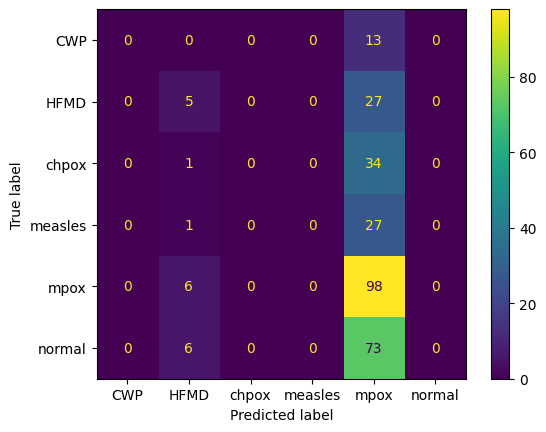

In [176]:
trial(wavelet_df[wavelet_df["type"]=="train"].iloc[:,:32],
      wavelet_df[wavelet_df["type"]=="test"].iloc[:,:32],
      wavelet_df[wavelet_df["type"]=="train"]["labels"],
      wavelet_df[wavelet_df["type"]=="test"]["labels"])

In [178]:
MSDz=wavelet_df[wavelet_df["type"]=="train"].groupby("labels").head(684)
MSDz.reset_index(inplace=True)
MSDz=MSDz.drop(columns=["index"])

Accuracy: 0.31958762886597936


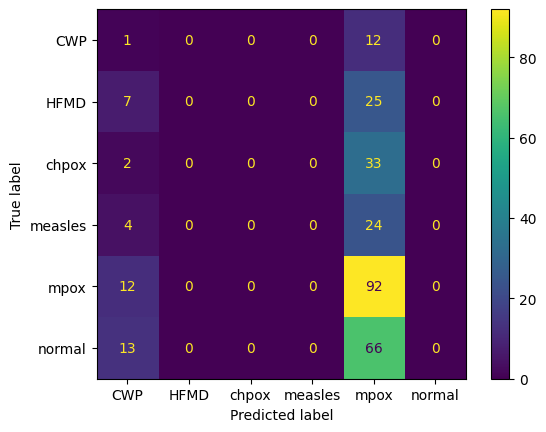

In [180]:
trial(MSDz.iloc[:,:32],
      wavelet_df[wavelet_df["type"]=="test"].iloc[:,:32],
      MSDz[MSDz["type"]=="train"]["labels"],
      wavelet_df[wavelet_df["type"]=="test"]["labels"])

In [181]:
MSD_pd = pd.get_dummies(wavelet_df, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



Mean_cA      Std_cA  Max_cA  Min_cA        Var_cA   Skew_cA  \
0     321.029815  107.220245   499.0    19.5  11496.181011 -0.615271   
1     356.658253   92.394315   503.0     5.0   8536.709515 -1.117531   
2     323.731934  105.785538   494.0     0.5  11190.580130 -1.532355   
3     295.358937  115.967210   510.0    13.0  13448.393835 -0.088193   
4     271.715202  120.298460   510.0     0.0  14471.719423  0.160898   
...          ...         ...     ...     ...           ...       ...   
7267  357.538514   88.533952   508.0     2.0   7838.260669 -0.908789   
7268  390.165607  140.870140   510.0     3.5  19844.396457 -0.929339   
7269  303.758490  112.663610   507.0     8.5  12693.088935 -0.400759   
7270  351.906170  101.203609   499.0     9.5  10242.170555 -0.684300   
7271  274.021395   92.310079   499.0     4.0   8521.150705 -0.134531   

      Kurtosis_cA  Entropy_cA   Mean_cH     Std_cH  ...  Kurtosis_cD  \
0       -0.519062   10.759447  0.107741   6.685714  ...     8.691917   
1        1.465731   10.783134 -0.208416   3.332422  ...     8.537494   
2        1.180141   10.752195 -0.010174  12.242195  ...    68.106545   
3       -0.943807   10.739831  0.316645   8.080304  ...    21.594010   
4       -0.831641   10.718830 -0.048928   7.488020  ...    43.696699   
...           ...         ...       ...        ...  ...          ...   
7267     0.364066   10.788577 -0.420430   6.468973  ...    15.643628   
7268    -0.381657   10.743551  0.398248  10.135799  ...    17.007377   
7269    -0.747331   10.745150  0.443419   9.624725  ...   259.810990   
7270     0.466920   10.774958 -0.073322   3.981872  ...    20.930390   
7271    -1.050544   10.763008 -0.144262   9.434876  ...    18.805866   

      Entropy_cD                                              paths   type  \
0       9.390645  /kaggle/input/mpox-skin-lesion-dataset-version...  train   
1       9.516373  /kaggle/input/monkeypoxskinimagedataset/Monkey...  train   
2       8.456745  /kaggle/input/monkeypoxskinimagedataset/Monkey...  train   
3       9.164964  /kaggle/input/monkeypoxskinimagedataset/Monkey...  train   
4       8.550572  /kaggle/input/mpox-skin-lesion-dataset-version...  train   
...          ...                                                ...    ...   
7267    9.346028  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7268    9.038676  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7269    8.855406  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7270    9.022364  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test   
7271    8.984632  /kaggle/input/mpox-skin-lesion-dataset-version...   test   

      labels_CWP  labels_HFMD  labels_chpox  labels_measles  labels_mpox  \
0              0            1             0               0            0   
1              0            0             1               0            0   
2              0            0             0               0            0   
3              0            0             1               0            0   
4              0            0             0               0            0   
...          ...          ...           ...             ...          ...   
7267           0            0             1               0            0   
7268           0            0             0               0            0   
7269           0            0             0               0            0   
7270           0            0             1               0            0   
7271           0            1             0               0            0   

      labels_normal  
0                 0  
1                 0  
2                 1  
3                 0  
4                 1  
...             ...  
7267              0  
7268              1  
7269              1  
7270              0  
7271              0  

[7272 rows x 40 columns]

In [183]:
MSDx=MSD_pd[MSD_pd["type"]=="train"].groupby("labels_mpox").head(1241)
MSDx.reset_index(inplace=True)
MSDx=MSDx.drop(columns=["index"])

Accuracy: 0.5910652920962199
[0 1]


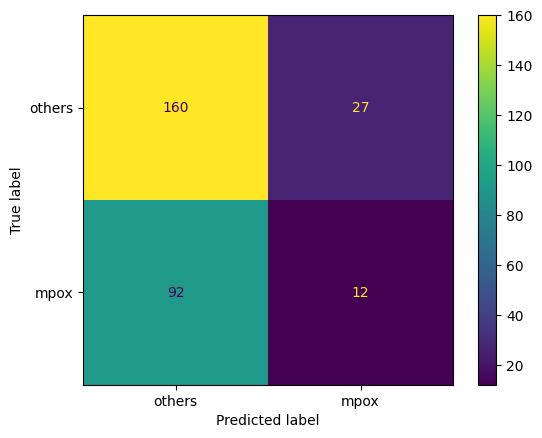

In [184]:
trial(MSDx.iloc[:,:32],
      MSD_pd[MSD_pd["type"]=="test"].iloc[:,:32],
      MSDx[MSDx["type"]=="train"]["labels_mpox"],
      MSD_pd[MSD_pd["type"]=="test"]["labels_mpox"],
      binary=True)

## glcm of wavelet

In [52]:
glcm_wave=pd.DataFrame(columns=["ca_contrast",'ca_dissimilarity', 'ca_homogeneity', 'ca_energy', 'ca_correlation', 'ca_ASM','ch_contrast', 'ch_dissimilarity', 'ch_homogeneity', 'ch_energy', 'ch_correlation', 'ch_ASM','cv_contrast', 'cv_dissimilarity', 'cv_homogeneity', 'cv_energy', 'cv_correlation', 'cv_ASM','cd_contrast', 'cd_dissimilarity', 'cd_homogeneity', 'cd_energy', 'cd_correlation', 'cd_ASM'])
glcm_wave

Empty DataFrame
Columns: [ca_contrast, ca_dissimilarity, ca_homogeneity, ca_energy, ca_correlation, ca_ASM, ch_contrast, ch_dissimilarity, ch_homogeneity, ch_energy, ch_correlation, ch_ASM, cv_contrast, cv_dissimilarity, cv_homogeneity, cv_energy, cv_correlation, cv_ASM, cd_contrast, cd_dissimilarity, cd_homogeneity, cd_energy, cd_correlation, cd_ASM]
Index: []

[0 rows x 24 columns]

In [54]:

glcm_wave=pd.DataFrame(columns=["ca_contrast",'ca_dissimilarity', 'ca_homogeneity', 'ca_energy', 'ca_correlation', 'ca_ASM','ch_contrast', 'ch_dissimilarity', 'ch_homogeneity', 'ch_energy', 'ch_correlation', 'ch_ASM','cv_contrast', 'cv_dissimilarity', 'cv_homogeneity', 'cv_energy', 'cv_correlation', 'cv_ASM','cd_contrast', 'cd_dissimilarity', 'cd_homogeneity', 'cd_energy', 'cd_correlation', 'cd_ASM'])
for i in MSD["paths"]:
    merged=[]
    img=process_img1(i)
    feat =wave_glcm(img)
    merged = [item for sublist in feat for item in sublist]
    # print(len(merged))
    glcm_wave.loc[len(glcm_wave)]=merged

In [197]:
glcm_wave["paths"]=MSD["paths"]
glcm_wave["labels"]=MSD["labels"]
glcm_wave["type"]=MSD["type"]
glcm_wave

ca_contrast  ca_dissimilarity  ca_homogeneity  ca_energy  \
0     2211.651464         19.770512        0.122329   0.013134   
1      552.575048          8.192165        0.183343   0.018207   
2     1573.811856         14.067970        0.525279   0.120435   
3     2654.275177         23.490428        0.110205   0.011588   
4     2518.704553         20.294482        0.190421   0.025593   
...           ...               ...             ...        ...   
7267  2288.322313         18.121863        0.140653   0.015576   
7268  1912.783945         17.855856        0.429182   0.359505   
7269  3269.032979         24.106982        0.172020   0.021503   
7270   718.508768          7.888111        0.269491   0.036715   
7271  3049.638514         22.111004        0.108841   0.012201   

      ca_correlation    ca_ASM   ch_contrast  ch_dissimilarity  \
0           0.712155  0.000172  13192.298343         53.544482   
1           0.866274  0.000331  15600.156129         62.751528   
2           0.545436  0.014504   7178.245495         29.869208   
3           0.766996  0.000134  13243.147281         53.801239   
4           0.718073  0.000655   5089.931226         21.249920   
...              ...       ...           ...               ...   
7267        0.668101  0.000243  19732.686293         78.612613   
7268        0.852945  0.129244   9073.215010         37.714849   
7269        0.751741  0.000462  13959.507963         56.393742   
7270        0.717055  0.001348   9199.149292         36.884974   
7271        0.760739  0.000149  19125.680985         79.072555   

      ch_homogeneity  ch_energy  ...    cv_ASM   cd_contrast  \
0           0.434468   0.208513  ...  0.021442  13936.925997   
1           0.419368   0.205922  ...  0.044512  11896.249920   
2           0.720719   0.627462  ...  0.306872   8417.284106   
3           0.468639   0.267548  ...  0.015384  14902.317568   
4           0.775472   0.669860  ...  0.089027   3598.905808   
...              ...        ...  ...       ...           ...   
7267        0.447318   0.290940  ...  0.012681  18459.145270   
7268        0.631596   0.511384  ...  0.181517  11195.284186   
7269        0.549140   0.379880  ...  0.038713  10568.789495   
7270        0.706187   0.560749  ...  0.100433   7135.393018   
7271        0.276670   0.127407  ...  0.010679  24512.318452   

      cd_dissimilarity  cd_homogeneity  cd_energy  cd_correlation    cd_ASM  \
0            55.248874        0.682386   0.607366        0.039514  0.368894   
1            47.006355        0.727608   0.652489        0.066017  0.425742   
2            34.219916        0.776659   0.735816        0.261504  0.541425   
3            59.291184        0.649430   0.572204        0.073728  0.327418   
4            14.560891        0.899978   0.886391       -0.030350  0.785689   
...                ...             ...        ...             ...       ...   
7267         73.180824        0.574011   0.481009        0.040278  0.231370   
7268         45.034508        0.732885   0.685196        0.150399  0.469493   
7269         42.447474        0.729455   0.669349        0.193798  0.448028   
7270         28.324003        0.835461   0.797858        0.075852  0.636577   
7271         98.457931        0.435342   0.355419       -0.071330  0.126322   

                                                  paths  labels   type  
0     /kaggle/input/mpox-skin-lesion-dataset-version...    HFMD  train  
1     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
2     /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal  train  
3     /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox  train  
4     /kaggle/input/mpox-skin-lesion-dataset-version...  normal  train  
...                                                 ...     ...    ...  
7267  /kaggle/input/monkeypoxskinimagedataset/Monkey...   chpox   test  
7268  /kaggle/input/monkeypoxskinimagedataset/Monkey...  normal   test  
7269  /kaggle/input/monkeypoxskinimagedataset

In [198]:
csv_file_path = 'glcm_wave.csv' 
glcm_wave.to_csv(csv_file_path, index=False)


Accuracy: 0.3402061855670103


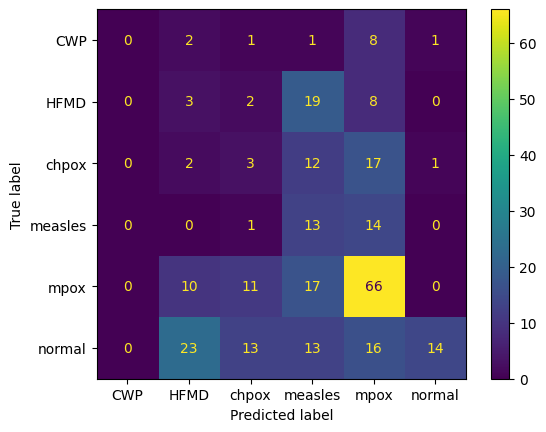

In [199]:
trial(glcm_wave[glcm_wave["type"]=="train"].iloc[:,:24],
      glcm_wave[glcm_wave["type"]=="test"].iloc[:,:24],
      glcm_wave[glcm_wave["type"]=="train"]["labels"],
      glcm_wave[glcm_wave["type"]=="test"]["labels"])

In [201]:
MSDz=glcm_wave[glcm_wave["type"]=="train"].groupby("labels").head(684)
MSDz.reset_index(inplace=True)
MSDz=MSDz.drop(columns=["index"])

Accuracy: 0.4020618556701031


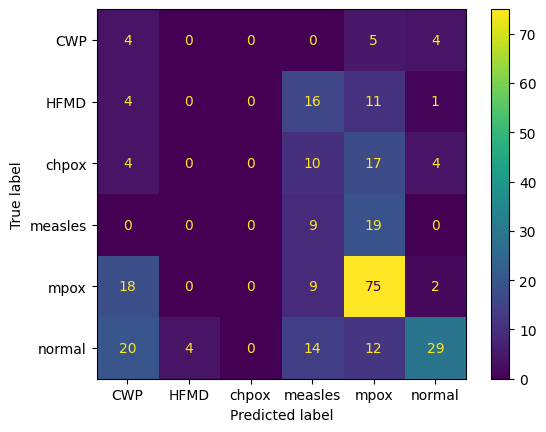

In [203]:
trial(MSDz.iloc[:,:24],
      glcm_wave[glcm_wave["type"]=="test"].iloc[:,:24],
      MSDz[MSDz["type"]=="train"]["labels"],
      glcm_wave[glcm_wave["type"]=="test"]["labels"])

In [205]:
MSD_pd = pd.get_dummies(glcm_wave, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



ca_contrast  ca_dissimilarity  ca_homogeneity  ca_energy  \
0     2211.651464         19.770512        0.122329   0.013134   
1      552.575048          8.192165        0.183343   0.018207   
2     1573.811856         14.067970        0.525279   0.120435   
3     2654.275177         23.490428        0.110205   0.011588   
4     2518.704553         20.294482        0.190421   0.025593   
...           ...               ...             ...        ...   
7267  2288.322313         18.121863        0.140653   0.015576   
7268  1912.783945         17.855856        0.429182   0.359505   
7269  3269.032979         24.106982        0.172020   0.021503   
7270   718.508768          7.888111        0.269491   0.036715   
7271  3049.638514         22.111004        0.108841   0.012201   

      ca_correlation    ca_ASM   ch_contrast  ch_dissimilarity  \
0           0.712155  0.000172  13192.298343         53.544482   
1           0.866274  0.000331  15600.156129         62.751528   
2           0.545436  0.014504   7178.245495         29.869208   
3           0.766996  0.000134  13243.147281         53.801239   
4           0.718073  0.000655   5089.931226         21.249920   
...              ...       ...           ...               ...   
7267        0.668101  0.000243  19732.686293         78.612613   
7268        0.852945  0.129244   9073.215010         37.714849   
7269        0.751741  0.000462  13959.507963         56.393742   
7270        0.717055  0.001348   9199.149292         36.884974   
7271        0.760739  0.000149  19125.680985         79.072555   

      ch_homogeneity  ch_energy  ...  cd_correlation    cd_ASM  \
0           0.434468   0.208513  ...        0.039514  0.368894   
1           0.419368   0.205922  ...        0.066017  0.425742   
2           0.720719   0.627462  ...        0.261504  0.541425   
3           0.468639   0.267548  ...        0.073728  0.327418   
4           0.775472   0.669860  ...       -0.030350  0.785689   
...              ...        ...  ...             ...       ...   
7267        0.447318   0.290940  ...        0.040278  0.231370   
7268        0.631596   0.511384  ...        0.150399  0.469493   
7269        0.549140   0.379880  ...        0.193798  0.448028   
7270        0.706187   0.560749  ...        0.075852  0.636577   
7271        0.276670   0.127407  ...       -0.071330  0.126322   

                                                  paths   type  labels_CWP  \
0     /kaggle/input/mpox-skin-lesion-dataset-version...  train           0   
1     /kaggle/input/monkeypoxskinimagedataset/Monkey...  train           0   
2     /kaggle/input/monkeypoxskinimagedataset/Monkey...  train           0   
3     /kaggle/input/monkeypoxskinimagedataset/Monkey...  train           0   
4     /kaggle/input/mpox-skin-lesion-dataset-version...  train           0   
...                                                 ...    ...         ...   
7267  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7268  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7269  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7270  /kaggle/input/monkeypoxskinimagedataset/Monkey...   test           0   
7271  /kaggle/input/mpox-skin-lesion-dataset-version...   test           0   

      labels_HFMD  labels_chpox  labels_measles  labels_mpox  labels_normal  
0               1             0               0            0              0  
1               0             1               0            0              0  
2               0             0               0            0              1  
3               0             1               0            0              0  
4               0             0               0            0              1  
...           ...           ...             ...          ...            ...  
7267            0             1               0            0              0  
7268            0             0               0            0      

In [206]:
MSDx=MSD_pd[MSD_pd["type"]=="train"].groupby("labels_mpox").head(1241)
MSDx.reset_index(inplace=True)
MSDx=MSDx.drop(columns=["index"])

Accuracy: 0.5773195876288659
[0 1]


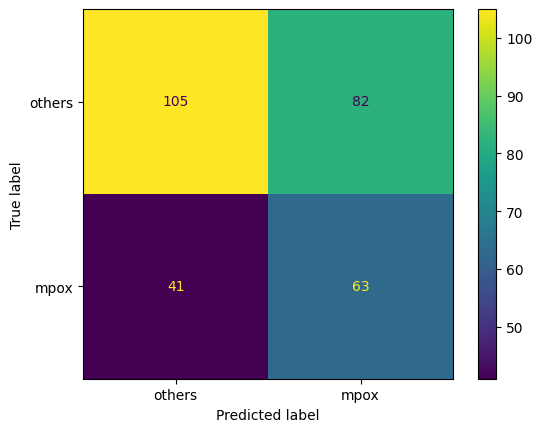

In [207]:
trial(MSDx.iloc[:,:24],
      MSD_pd[MSD_pd["type"]=="test"].iloc[:,:24],
      MSDx[MSDx["type"]=="train"]["labels_mpox"],
      MSD_pd[MSD_pd["type"]=="test"]["labels_mpox"],
      binary=True)

## local binary pattern

In [ ]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
lbp_features = extract_lbp_features(img)
print("Extracted LBP features:", lbp_features)
lbp_image = local_binary_pattern(img, 8, 1, method='uniform')
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP Image')
plt.show()


## hough transform ( circle )

In [ ]:
features=pd.DataFrame(columns=["paths","num_circles","mean_radi","std_radi"])
for i in MSD["paths"]:
    img = cv2.imread(i)
    feature = extract_hough_circle_features(img)
    if not i :print(feature)
    features.loc[len(features)]=[i,feature[0],feature[1],feature[2]]
trial(features[["num_circles","mean_radi","std_radi"]],MSD["labels"])